In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [ ]:
# Load the Boston House price prediction dataset
df = pd.read_csv('Boston.csv')

df.head()



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Preprocess the dataset

from sklearn.preprocessing import StandardScaler

X= df.drop('medv',axis = 1)
y = df['medv']

print(X[:5])

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  
0  296     15.3  396.90   4.98  
1  242     17.8  396.90   9.14  
2  242     17.8  392.83   4.03  
3  222     18.7  394.63   2.94  
4  222     18.7  396.90   5.33  


In [ ]:
#Split the dataset
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state = 42)
print('training set shape:',X_train.shape,y_train.shape)
print('testing set shape:',X_test.shape,y_test.shape)

training set shape: (354, 14) (354,)
testing set shape: (152, 14) (152,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

print(model.summary())

# model = Sequential(): This line initializes a sequential model, which is a linear stack of layers. In a sequential model, each layer is connected to the previous one, creating a feed-forward neural network.

# model.add(Dense(64, input_dim=14, activation='relu')): This line adds a dense layer to the model. A dense layer is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer. The parameters passed to this layer are:

# 64: This specifies the number of neurons or units in the layer.
# input_dim=14: This specifies the input dimension of the layer, which is 14 in this case.
# activation='relu': This specifies the activation function to be used in the layer. ReLU (Rectified Linear Unit) is a popular activation function that introduces non-linearity to the network.
# model.add(Dropout(0.2)): This line adds a dropout layer to the model. Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction (0.2 in this case) of input units to 0 at each update during training, which helps in reducing the interdependence of neurons and forces the model to learn more robust features.

# model.add(Dense(32, activation='relu')): This line adds another dense layer to the model with 32 units and ReLU activation.

# model.add(Dense(1)): This line adds the output layer to the model. It is a dense layer with a single neuron since it's a regression problem (predicting a single continuous value). There is no activation function specified in this case, which means it will be a linear activation by default.

# print(model.summary()): This line prints a summary of the model, including the number of parameters in each layer and the total number of parameters in the model.

# Overall, this code defines a simple neural network model with an input layer of 14 neurons, two hidden layers with 64 and 32 neurons respectively, a dropout layer, and an output layer with a single neuron. The ReLU activation function is used for the hidden layers, and the model is designed for regression tasks.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])



# Mean Squared Error (MSE) is a common loss function used in regression tasks to measure the average squared difference between the predicted and actual values. It quantifies how well the model is performing by calculating the average of the squared differences between the predicted values and the true values.
# Adam dynamically adjusts the learning rate during training based on the past gradients, which makes it well-suited for handling sparse gradients and training in noisy environments. 

In [ ]:
from keras.callbacks import EarlyStopping

# EarlyStopping is a technique used during the training of a machine learning model, particularly in the context of neural networks, to prevent overfitting and improve generalization.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 1s 30ms/step - loss: 2743.4827 - mean_absolute_error: 41.8467 - val_loss: 959.6757 - val_mean_absolute_error: 28.1530
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1924.0903 - mean_absolute_error: 35.9733 - val_loss: 131.5275 - val_mean_absolute_error: 8.7043
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1005.5015 - mean_absolute_error: 25.7417 - val_loss: 192.2799 - val_mean_absolute_error: 10.0408
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 880.6540 - mean_absolute_error: 23.1910 - val_loss: 142.7845 - val_mean_absolute_error: 9.5206
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 798.5859 - mean_absolute_error: 21.6128 - val_loss: 108.5462 - val_mean_absolute_error: 7.1035
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 798.8143 - mean_absolute_error: 22.0608 - val_loss: 144.2377 - val_mean_absolute_error: 9.693

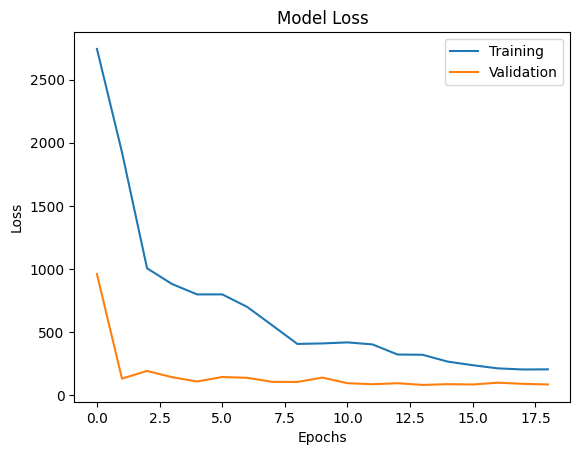

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend(['Training','Validation']) 
plt.show()

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', mae)


5/5 [==============================] - 0s 4ms/step - loss: 58.5012 - mean_absolute_error: 5.6428
Mean Absolute Error: 5.642828464508057
